### Project-Breast-Cancer (Data-Exploration)
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data  
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [59]:
# Import required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
#import ggplot as gg
from plotnine import *

In [107]:
# Import training data (unscaled)
data_train = pd.read_csv('../data/training_data.csv', index_col = 0)

# Import training data (scaled)
data_train_scaled = pd.read_csv('../output/data_train_scaled.csv', index_col = 0)

# Labels for training data
train_labels = pd.read_csv('../data/training_data.csv', index_col = 0)['diagnosis'].values

### Boxplot of distributions

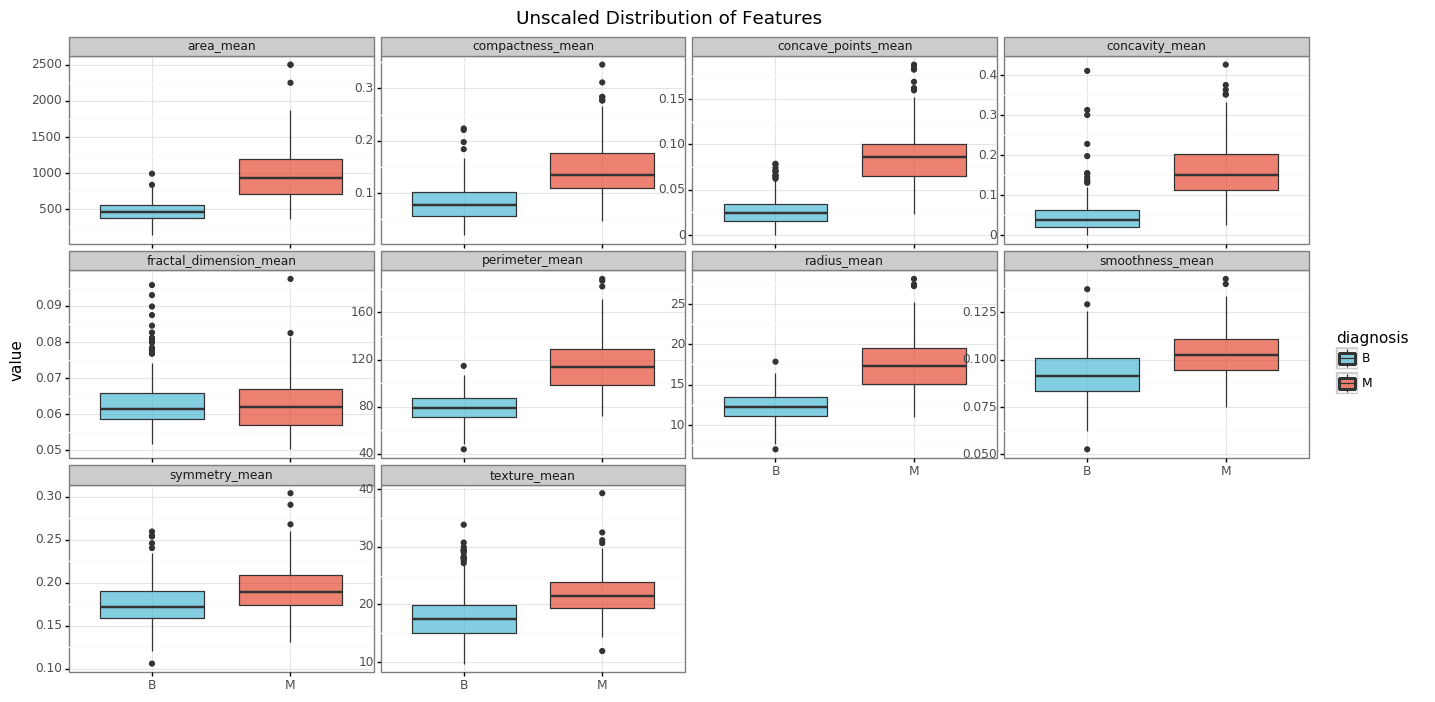

<ggplot: (-9223372029295078866)>

In [88]:
# Select only the first 10 features to plot
df_boxplot = data_train[['radius_mean', 'texture_mean', 'perimeter_mean', 
                         'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                         'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
                         'diagnosis']]

# Melt data so its very long
df_boxplot_melt = pd.melt(df_boxplot, ["diagnosis"],
                          var_name="variable",
                          value_name="value")

# Wrap boxplots for each feature
(ggplot(df_boxplot_melt, aes('diagnosis', y='value', fill = 'diagnosis')) +
    geom_boxplot() +\
    facet_wrap('~variable', scales="free") + \
    scale_fill_manual(values=['#4DBBD5B2', '#E64B35B2']) +\
    theme_seaborn() +\
    xlab("") + ggtitle("Unscaled Distribution of Features") +\
    theme(figure_size=(16, 8))
)

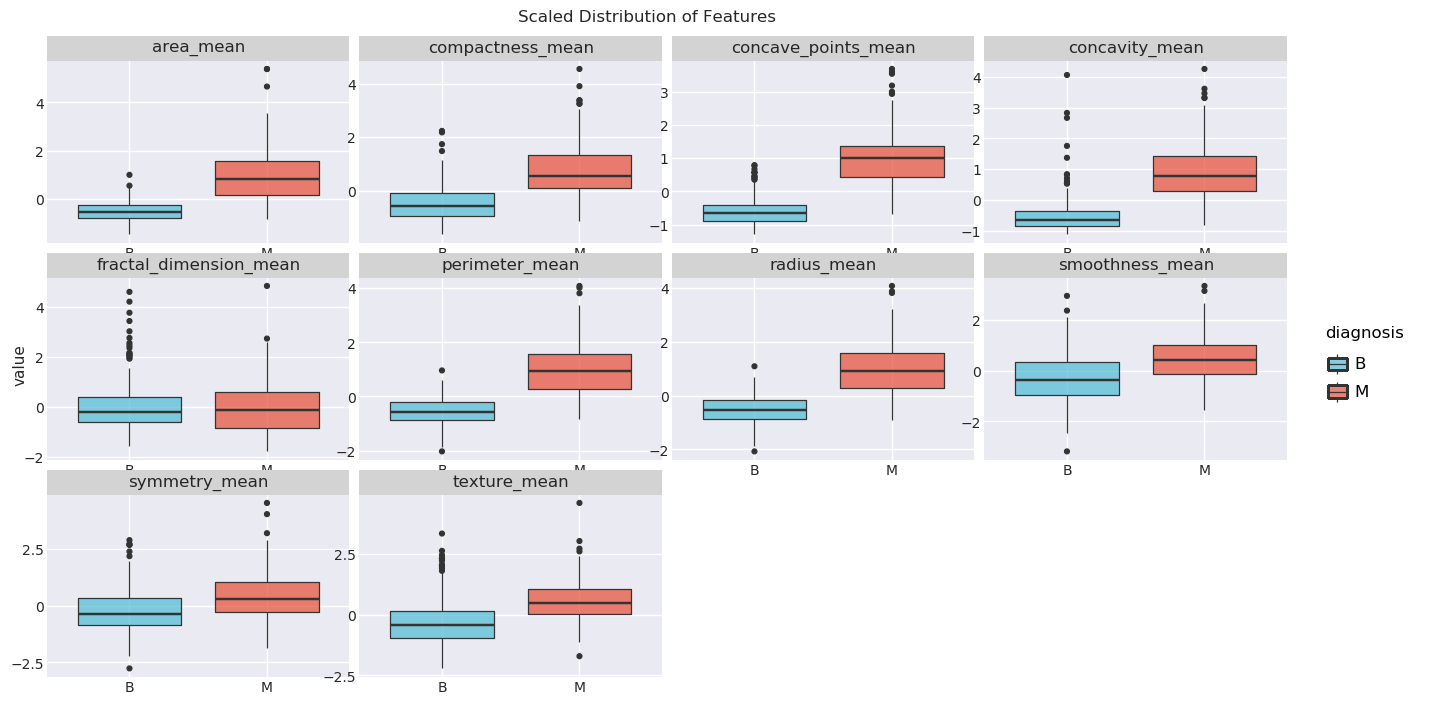

<ggplot: (7561674276)>

In [115]:
# Select only the first 10 features to plot from scaled data
df_boxplot_scaled = data_train_scaled[['radius_mean', 'texture_mean', 'perimeter_mean', 
                                       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                                       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
                                       'diagnosis']]

# Melt data so its very long
df_boxplot_scaled_melt = pd.melt(df_boxplot_scaled, ["diagnosis"],
                                 var_name="variable",
                                 value_name="value")

# Wrap boxplots for each feature
(ggplot(df_boxplot_scaled_melt, aes('diagnosis', y='value', fill = 'diagnosis')) +
    geom_boxplot() +\
    facet_wrap('~variable', scales="free") + \
    scale_fill_manual(values=['#4DBBD5B2', '#E64B35B2']) +\
    theme_seaborn() +\
    xlab("") + ggtitle("Scaled Distribution of Features") +\
    theme(figure_size=(16, 8))
)

### Linegraph of features over samples

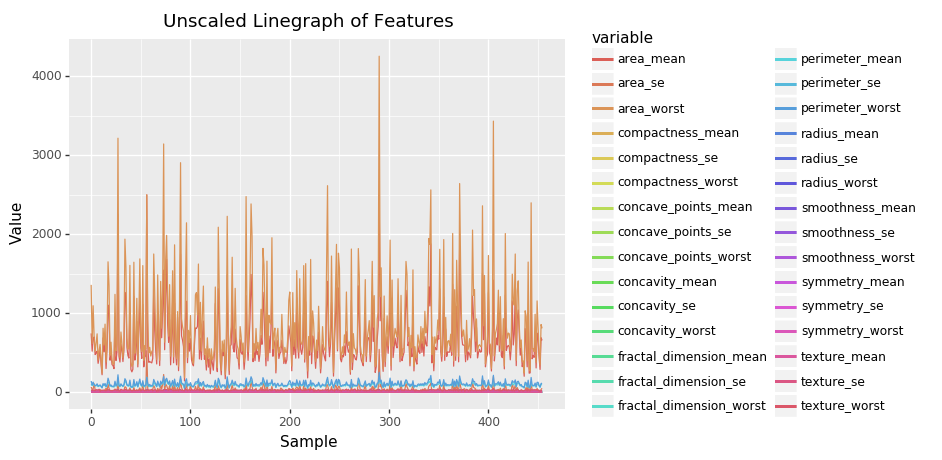

<ggplot: (-9223372029293968275)>

In [116]:
# Make a copy of the data
line_df = data_train.copy()

# Add a number of values as a column
line_df['sample_number'] = [i for i in range(0, len(line_df))]

# Remove diagnosis and ID
line_df = line_df.drop(['id', 'diagnosis'], axis = 1)

# Melt data to get each samples value over every variable
line_df_melt = pd.melt(line_df, ["sample_number"],
                       var_name="variable",
                       value_name="value")


# Plot all features over all samples to find abnormal distributions
(ggplot(line_df_melt, aes('sample_number', 'value')) +\
 geom_line(aes(group = 'variable', color = 'variable')) +\
 xlab("Sample") + ylab('Value') + ggtitle('Unscaled Linegraph of Features')
)

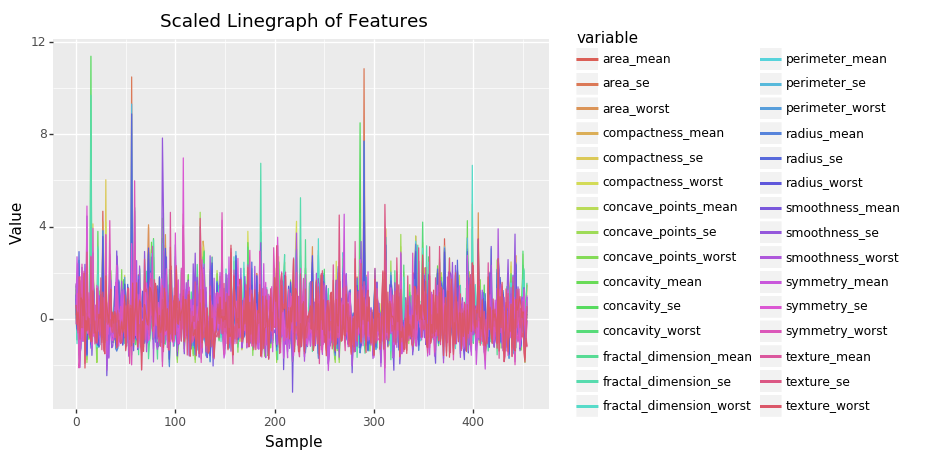

<ggplot: (-9223372029296051824)>

In [117]:
# Make a copy of the data
line_df_scaled = data_train_scaled.copy()

# Add a number of values as a column
line_df_scaled['sample_number'] = [i for i in range(0, len(line_df_scaled))]

# Remove diagnosis and ID
line_df_scaled = line_df_scaled.drop(['id', 'diagnosis'], axis = 1)

# Melt data to get each samples value over every variable
line_df_scaled_melt = pd.melt(line_df_scaled, ["sample_number"],
                              var_name="variable",
                              value_name="value")


# Plot all features over all samples to find abnormal distributions
(ggplot(line_df_scaled_melt, aes('sample_number', 'value')) +\
 geom_line(aes(group = 'variable', color = 'variable')) +\
 xlab("Sample") + ylab('Value') + ggtitle('Scaled Linegraph of Features')
)

### PCA

In [129]:
# Make a PCA of all the features
from sklearn.decomposition import PCA

# Create new PCA model (Use 2 components)
pca = PCA(n_components = 2)

# Fit the scaled data to the model
pca_fitted = pca.fit_transform(data_train_scaled.drop(['id', 'diagnosis'], axis = 1))

# Create a new dataframe to store PC's
pca_df = pd.DataFrame(data = pca_fitted, columns = ['PC1', 'PC2'])

# Add class information as a column identifier
pca_df['diagnosis'] = data_train.diagnosis.values

# Print the explain variance calculated
print("PC1 explains: ", pca.explained_variance_ratio_[0] * 100, "%")
print("PC2 explains: ", pca.explained_variance_ratio_[1] * 100, "%")
pc1_axis = round(pca.explained_variance_ratio_[0] * 100, 1)
pc2_axis = round(pca.explained_variance_ratio_[1] * 100, 1)

PC1 explains:  43.5269961844 %
PC2 explains:  19.7944805587 %


43.5

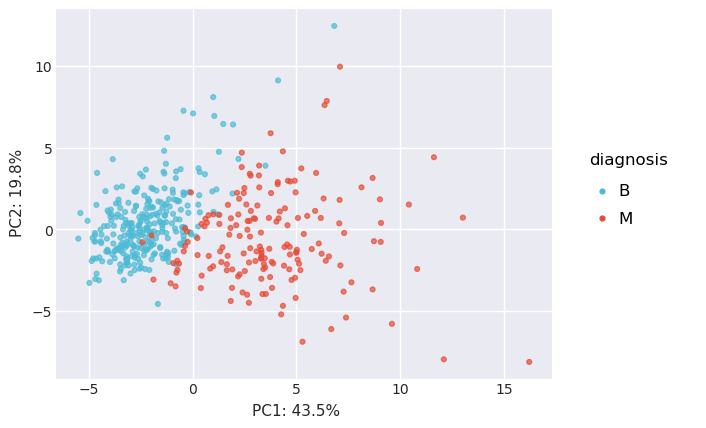

<ggplot: (7558216270)>

In [141]:
# Make a scatterplot of the values
(ggplot(pca_df, aes('PC1', 'PC2', colour = 'diagnosis')) +\
 geom_point() +
 xlab("PC1: " + str(pc1_axis) + "%") +\
 ylab("PC2: " + str(pc2_axis) + "%") +\
 scale_colour_manual(values=['#4DBBD5B2', '#E64B35B2']) +\
 theme_seaborn()
)

### T-SNE

In [137]:
from sklearn.manifold import TSNE # TSNE module

# Create TSNE model
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)

# Fit on unscaled data
tsne_results = tsne.fit_transform(data_train_scaled.drop(['id', 'diagnosis'], axis = 1))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 455 samples in 0.001s...
[t-SNE] Computed neighbors for 455 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 455 / 455
[t-SNE] Mean sigma: 1.620015
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.314629
[t-SNE] Error after 1400 iterations: 0.780888


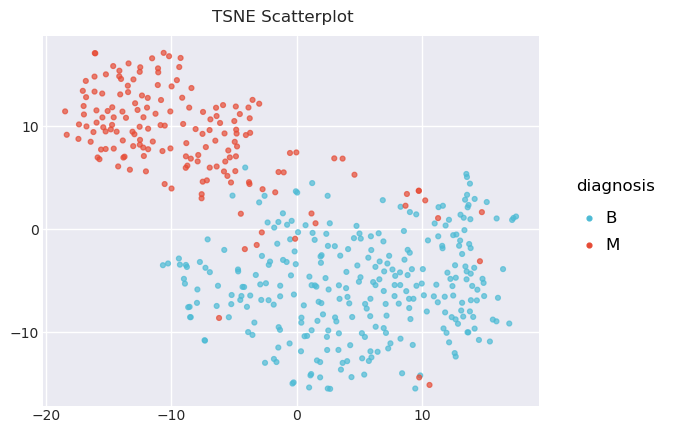

<ggplot: (7562060457)>

In [143]:
# Create a new dataframe to store TSNE
tsne_df = pd.DataFrame(data = tsne_results, columns = ['TSNE1', 'TSNE2'])

# Add class information as a column identifier
tsne_df['diagnosis'] = data_train_scaled.diagnosis.values

# Plot data
# Make a scatterplot of the values
(ggplot(tsne_df, aes('TSNE1', 'TSNE2', colour = 'diagnosis')) +\
 geom_point() +
 theme_seaborn() +\
 scale_colour_manual(values=['#4DBBD5B2', '#E64B35B2']) +\
 ggtitle("TSNE Scatterplot") + ylab("") + xlab('')
)